## Homework 1: Histogram Equalization and Specification

##### 1. Please prepare four images: (a) dark; (b) bright; (c) low contrast; (d) high contrast

    (a) Describe how you generate your four images. Show the images together with the corresponding histograms.

In [1]:
# import module
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def namestr(obj, namespace):
    string = str([name for name in namespace if namespace[name] is obj])
    return string[2:-2]

In [3]:
def output(name, img):
    plt.figure(num=name, figsize=(8,4))

    plt.subplot(1, 2, 1)
    plt.title(namestr(img, globals()))
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.hist(img.flatten(), bins=256)
    plt.title(namestr(img, globals()) + ' Histogram')
    plt.xlabel('Bins')
    plt.xlim([-10, 265])
    plt.ylabel('Amounts of pixels')

    plt.tight_layout()
    plt.savefig('img/' + name + '.png') 
    plt.show()

In [4]:
def output_four(name, img1, img2, img3, img4):
    # Show the images together with the corresponding histograms
    plt.figure(num=name, figsize=(16,8))

    plt.subplot(2, 4, 1)
    plt.title(namestr(img1, globals()))
    plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.title(namestr(img2, globals()))
    plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.title(namestr(img3, globals()))
    plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.title(namestr(img4, globals()))
    plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    plt.subplot(2, 4, 5)
    plt.hist(img1.flatten(), bins=256)
    plt.title( namestr(img1, globals()) + ' histogram')
    plt.xlabel('Bins')
    plt.xlim([-10, 265])
    plt.ylabel('Amounts of pixels')

    plt.subplot(2, 4, 6)
    plt.hist(img2.flatten(), bins=256)
    plt.title(namestr(img2, globals()) + ' histogram')
    plt.xlabel('Bins')
    plt.xlim([-10, 265])
    plt.ylabel('Amounts of pixels')

    plt.subplot(2, 4, 7)
    plt.hist(img3.flatten(), bins=256)
    plt.title(namestr(img3, globals()) + ' histogram')
    plt.xlabel('Bins')
    plt.xlim([-10, 265])
    plt.ylabel('Amounts of pixels')

    plt.subplot(2, 4, 8)
    plt.hist(img4.flatten(), bins=256)
    plt.title(namestr(img4, globals()) + ' histogram')
    plt.xlabel('Bins')
    plt.xlim([-10, 265])
    plt.ylabel('Amounts of pixels')

    plt.tight_layout()
    plt.savefig("img/" + name + ".png" ) 
    plt.show()


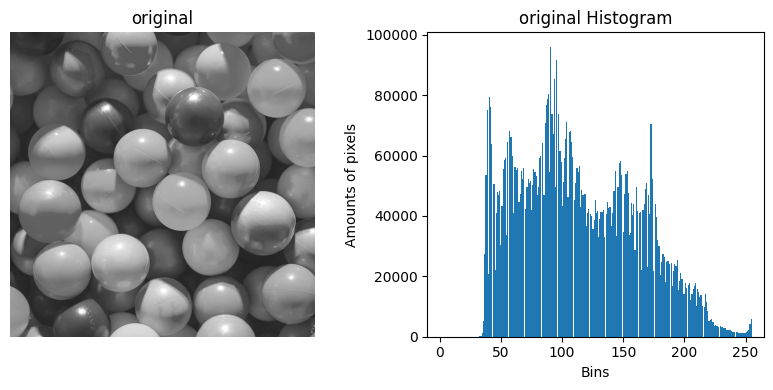

In [5]:
# load image and show the image and its histogram

original = cv2.imread('img\image.jpg', 0)
height, width = original.shape

output('original image', original)

In [6]:
# Declare the function
def transform(brightness, contrast):
    img = np.zeros((height, width), dtype=np.uint8)
    for x in range(width):
        for y in range(height):
            pixel = original[y, x]
            img[y, x] = max(0, min(255, contrast * pixel + brightness))
    return img

In [7]:
# Apply different adjustments to every image
dark     = transform(-60, 1)
bright   = transform(50, 1)
low_contrast  = transform(0, 0.4)
high_contrast = transform(0, 1.2)

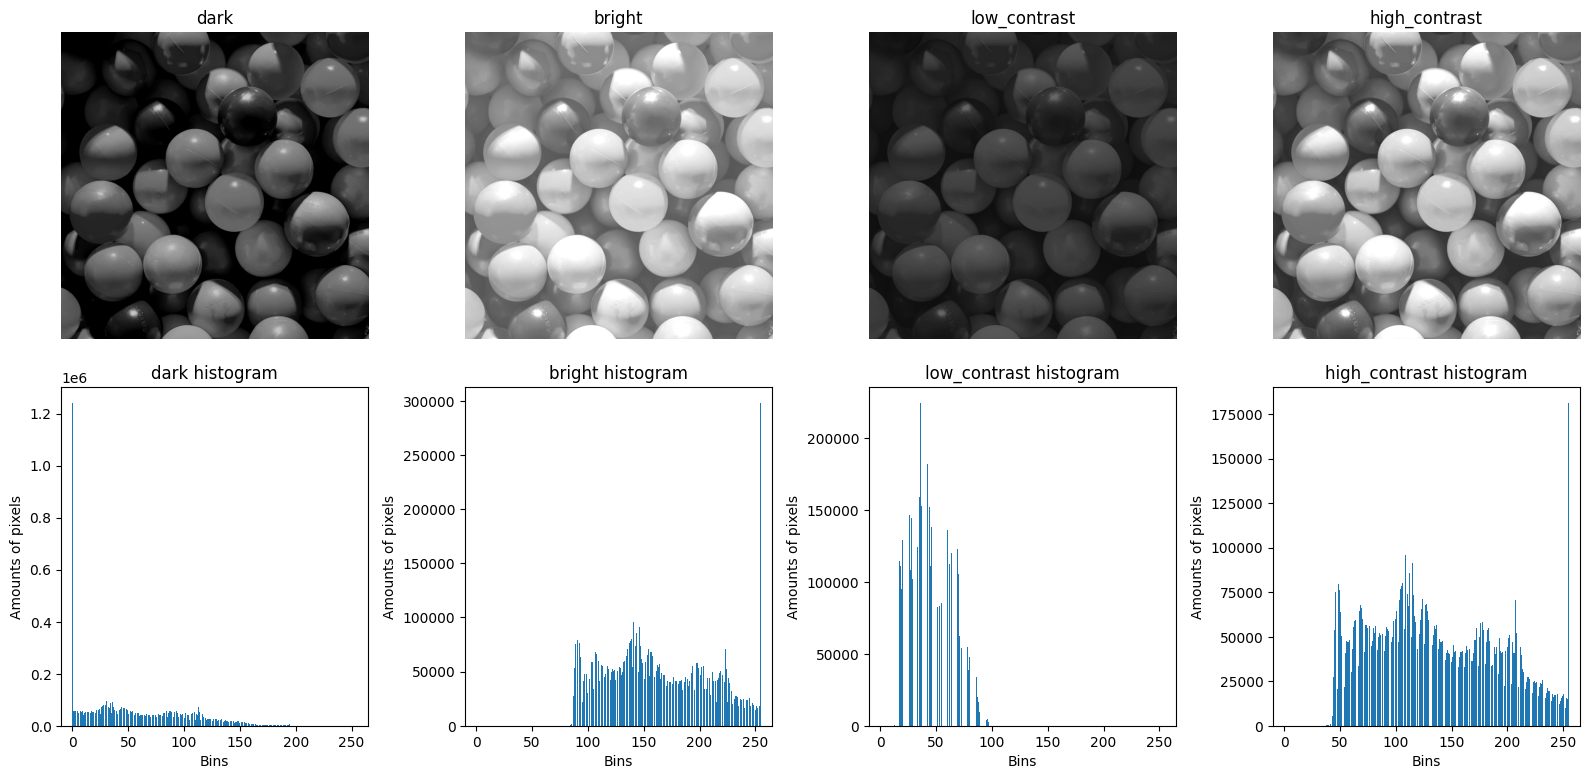

In [8]:
output_four('four images',dark, bright, low_contrast, high_contrast)

    (b) Find the transfer curves to enhance these images, show the results and histograms as well. Please take into account of the methods of contrast stretching and equalization and be sure to give the comparison & discussion.

    Contrast stretching - Min-Max Stretching

In [9]:
# Declare the Min-Max Stretching function
def minmax_stretching(img):
    img_contrast_stretching = np.zeros((height, width), dtype=np.uint8)
    min = np.min(img)
    max = np.max(img)
    for i in range(height):
        for j in range(width):
            img_contrast_stretching[i,j]  = 255 * (img[i,j] - min) / (max - min)
    return img_contrast_stretching

In [10]:
# Apply Min-Max Stretching to every image
minmax_dark = minmax_stretching(dark)
minmax_bright = minmax_stretching(bright)
minmax_low_contrast = minmax_stretching(low_contrast)
minmax_high_contrast = minmax_stretching(high_contrast)

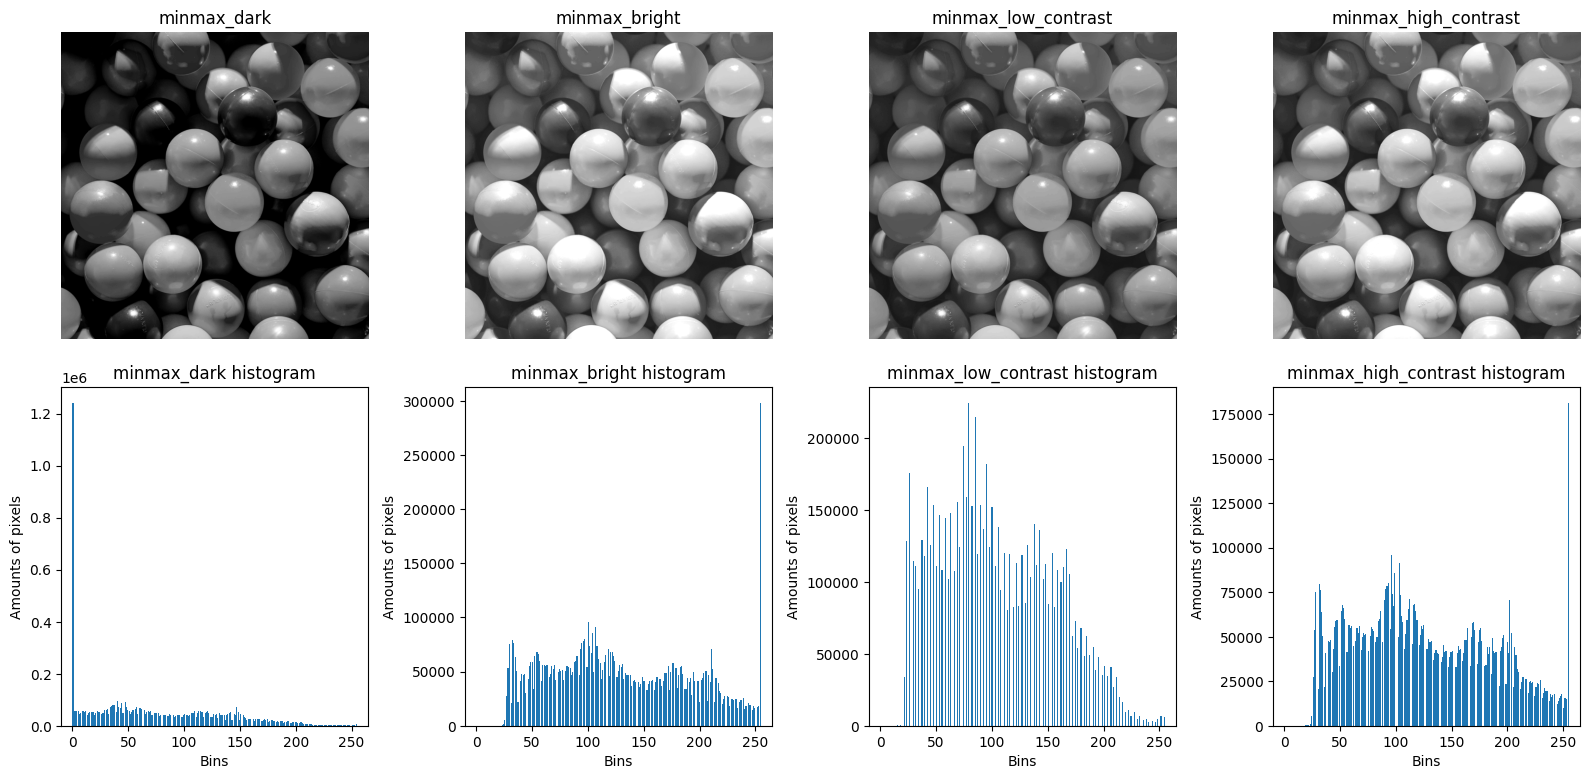

In [11]:
output_four('Min-Max stretching images',minmax_dark, minmax_bright, minmax_low_contrast, minmax_high_contrast)

    Equalization - Histogram Equilization

In [12]:
# Declare the Histogram Equalization function
def histogram_equalization(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cum_hist = np.cumsum(hist)
    cum_hist_normalized = cum_hist * float(hist.max()) / cum_hist.max()
    cdf_m = np.ma.masked_equal(cum_hist,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    lut = np.ma.filled(cdf_m,0).astype('uint8')
    return lut[img]

In [13]:
# Apply histogram equalization to every image
dark_histogram_equalization = histogram_equalization(dark)
bright_histogram_equalization = histogram_equalization(bright)
low_histogram_equalization = histogram_equalization(low_contrast)
high_histogram_equalization = histogram_equalization(high_contrast)

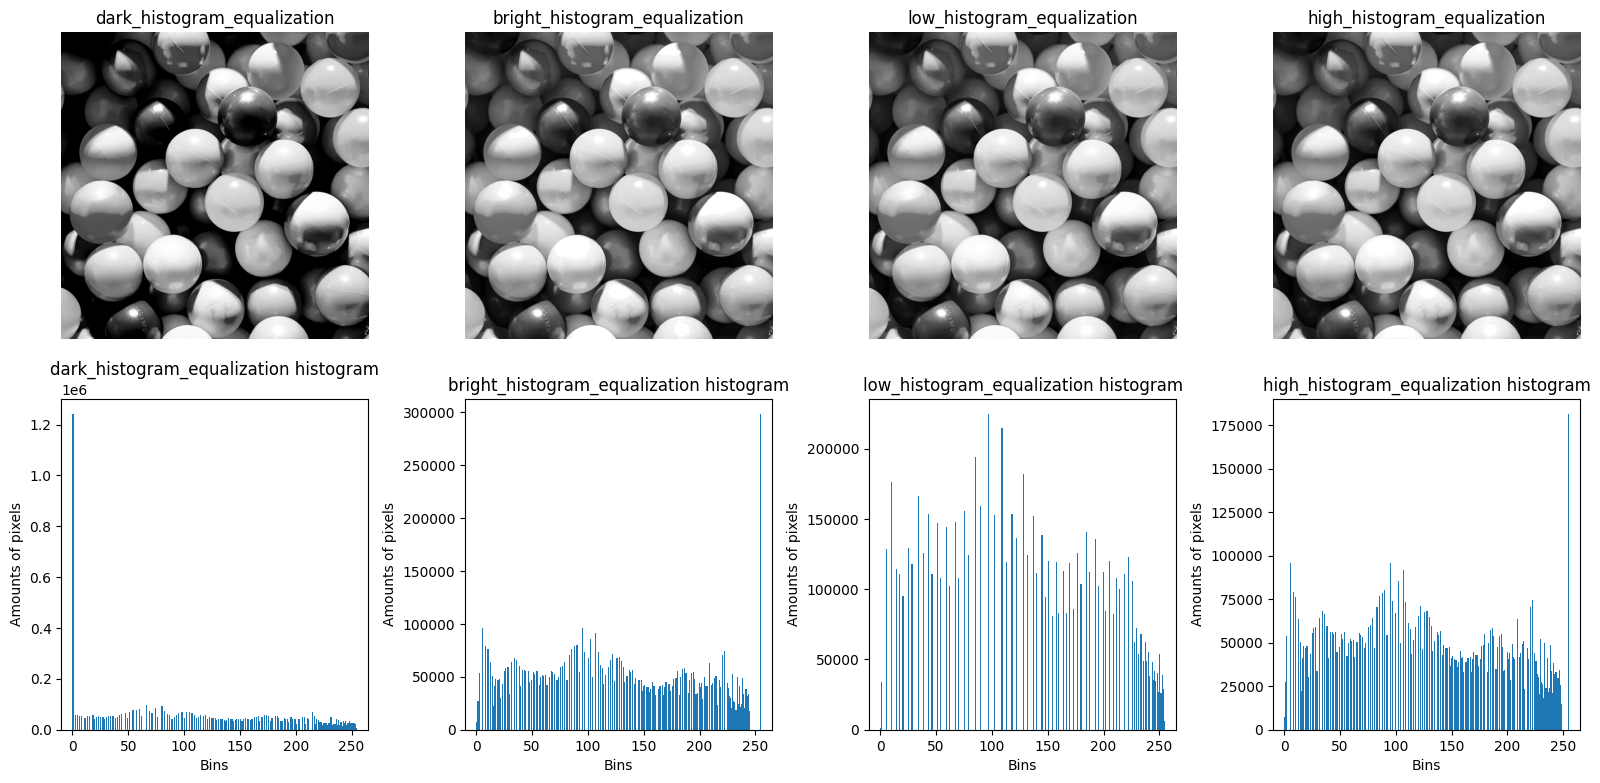

In [14]:
output_four('histogram equalization images',dark_histogram_equalization, bright_histogram_equalization, low_histogram_equalization, high_histogram_equalization)

##### 2. Select one noon picture from the internet, Most area of the noon is nearly dark because there is no light there.Enhance the selected image by using equalization and specification,compare the results and give a discussion.

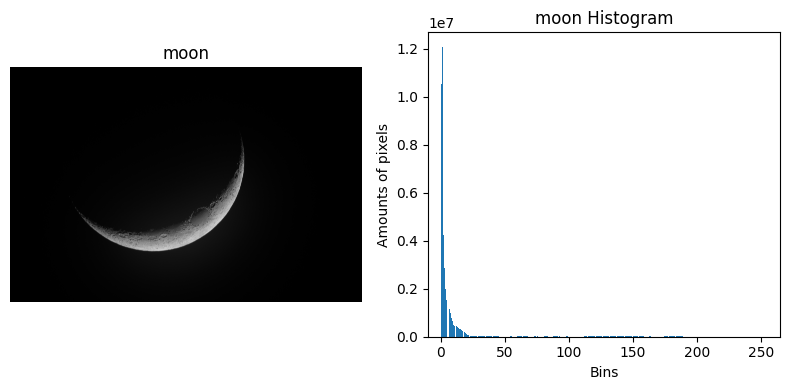

In [15]:
# load image and show the image and its histogram
moon = cv2.imread('img\quarter moon.jpg', 0)

output('Moon', moon)

    Equalization

In [16]:
# Use the same method as before for equalization
moon_histogram_equalization = histogram_equalization(moon)

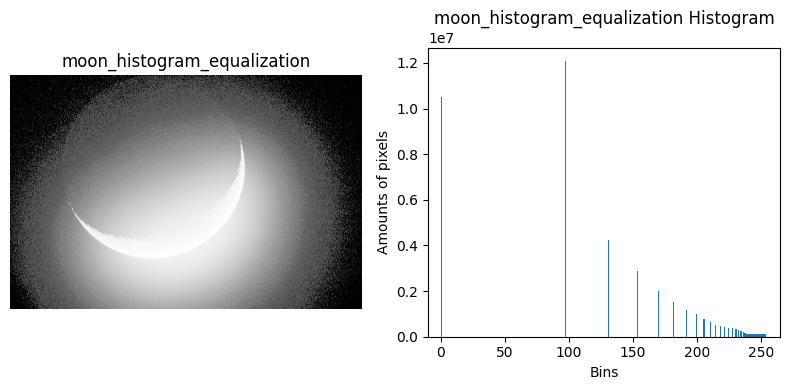

In [17]:
output('histogram equalization moon', moon_histogram_equalization)

    Specification

In [18]:
# Declare the Histogram Specification function
def specification(img):
    #
    hist_target = np.zeros((256,), dtype=np.float32)
    for i in range(256):
        hist_target[i] = np.exp(-(i - 120)**2 / (2 * 24**2)) / np.sqrt(2 * np.pi * 24**2)
    hist_target = cv2.normalize(hist_target, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    hist_target = np.round(hist_target).astype(np.uint8)

    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist_target.max() / cdf.max()

    lut = np.interp(hist_target, np.arange(256), cdf_normalized).astype(np.uint8)
    return cv2.LUT(img, lut)

In [19]:
moon_specification = specification(moon)

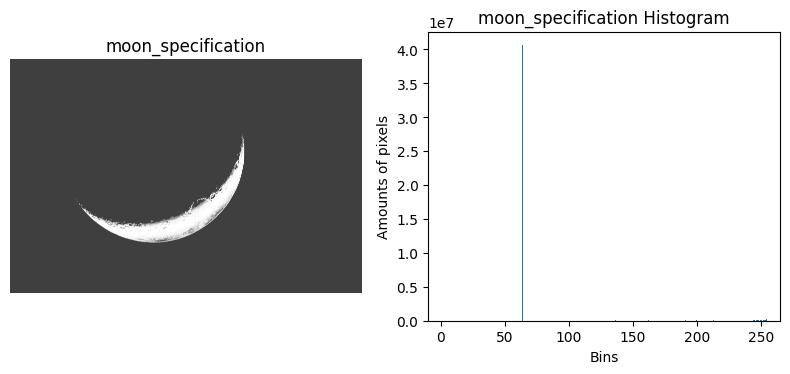

In [20]:
output('specification moon', moon_specification)